In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0928

Best Fitness:	700.7492
Solution:	700.0000
Diff:		0.7492

[0:03:59][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1175

Best Fitness:	700.7527
Solution:	700.0000
Diff:		0.7527

[0:07:15][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1895

Best Fitness:	700.9365
Solution:	700.0000
Diff:		0.9365

[0:10:24][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0938

Best Fitness:	700.8816
Solution:	700.0000
Diff:		0.8816

[0:13:47][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1423

Best Fitness:	700.7878
Solution:	700.0000
Diff:		0.7878

[0:17:02][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0979

Best Fitness:	700.6137
Solution:	700.0000
Diff:		0.6137

[0:20:19][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0849

Best Fitness:	700.6730
Solution:	700.0000
Diff:		0.6730

[0:23:11][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.2058

Best Fitness:	700.8479
Solution:	700.0000
Diff:		0.8479

[0:26:18][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1425

Best Fitness:	700.7714
Solution:	700.0000
Diff:		0.7714

[0:29:13][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0957

Best Fitness:	700.7582
Solution:	700.0000
Diff:		0.7582

[0:32:38][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1245

Best Fitness:	700.7322
Solution:	700.0000
Diff:		0.7322

[0:35:53][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1525

Best Fitness:	700.9456
Solution:	700.0000
Diff:		0.9456

[0:39:14][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1420

Best Fitness:	700.8148
Solution:	700.0000
Diff:		0.8148

[0:42:00][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1759

Best Fitness:	700.9621
Solution:	700.0000
Diff:		0.9621

[0:44:59][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0773

Best Fitness:	700.7045
Solution:	700.0000
Diff:		0.7045

[0:47:48][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1254

Best Fitness:	700.8380
Solution:	700.0000
Diff:		0.8380

[0:50:38][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1304

Best Fitness:	700.9053
Solution:	700.0000
Diff:		0.9053

[0:53:23][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1390

Best Fitness:	700.7730
Solution:	700.0000
Diff:		0.7730

[0:56:07][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0606

Best Fitness:	700.8066
Solution:	700.0000
Diff:		0.8066

[0:59:01][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1220

Best Fitness:	700.8824
Solution:	700.0000
Diff:		0.8824

[1:01:39][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1118

Best Fitness:	700.8387
Solution:	700.0000
Diff:		0.8387

[1:04:25][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0697

Best Fitness:	700.7097
Solution:	700.0000
Diff:		0.7097

[1:07:02][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0917

Best Fitness:	700.8774
Solution:	700.0000
Diff:		0.8774

[1:09:39][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1983

Best Fitness:	700.9852
Solution:	700.0000
Diff:		0.9852

[1:12:26][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1728

Best Fitness:	700.8965
Solution:	700.0000
Diff:		0.8965

[1:15:07][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0298

Best Fitness:	700.6737
Solution:	700.0000
Diff:		0.6737

[1:17:37][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1169

Best Fitness:	700.7630
Solution:	700.0000
Diff:		0.7630

[1:20:12][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1219

Best Fitness:	700.8574
Solution:	700.0000
Diff:		0.8574

[1:23:04][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.2248

Best Fitness:	700.9913
Solution:	700.0000
Diff:		0.9913

[1:25:52][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1284

Best Fitness:	700.8174
Solution:	700.0000
Diff:		0.8174

[1:28:42][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1406

Best Fitness:	700.9041
Solution:	700.0000
Diff:		0.9041

[1:31:37][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1530

Best Fitness:	700.7786
Solution:	700.0000
Diff:		0.7786

[1:34:17][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1153

Best Fitness:	700.5946
Solution:	700.0000
Diff:		0.5946

[1:36:31][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0743

Best Fitness:	700.8407
Solution:	700.0000
Diff:		0.8407

[1:38:47][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0974

Best Fitness:	700.7893
Solution:	700.0000
Diff:		0.7893

[1:41:10][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1092

Best Fitness:	700.8542
Solution:	700.0000
Diff:		0.8542

[1:43:38][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1175

Best Fitness:	700.6893
Solution:	700.0000
Diff:		0.6893

[1:46:07][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1100

Best Fitness:	700.8007
Solution:	700.0000
Diff:		0.8007

[1:48:41][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1570

Best Fitness:	700.7355
Solution:	700.0000
Diff:		0.7355

[1:51:17][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1745

Best Fitness:	700.9230
Solution:	700.0000
Diff:		0.9230

[1:53:40][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0812

Best Fitness:	700.8185
Solution:	700.0000
Diff:		0.8185

[1:56:08][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1538

Best Fitness:	700.8719
Solution:	700.0000
Diff:		0.8719

[1:58:38][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1534

Best Fitness:	700.9468
Solution:	700.0000
Diff:		0.9468

[2:01:00][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1336

Best Fitness:	700.3550
Solution:	700.0000
Diff:		0.3550

[2:03:19][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1017

Best Fitness:	700.8434
Solution:	700.0000
Diff:		0.8434

[2:05:48][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1202

Best Fitness:	700.8576
Solution:	700.0000
Diff:		0.8576

[2:08:17][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.0803

Best Fitness:	700.5935
Solution:	700.0000
Diff:		0.5935

[2:10:41][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1963

Best Fitness:	700.8347
Solution:	700.0000
Diff:		0.8347

[2:13:10][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1370

Best Fitness:	700.9393
Solution:	700.0000
Diff:		0.9393

[2:15:40][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1109

Best Fitness:	700.6723
Solution:	700.0000
Diff:		0.6723

[2:18:00][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	701.1775

Best Fitness:	700.7909
Solution:	700.0000
Diff:		0.7909

[2:20:40][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:20:40

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,1.227618,1.083167,1.172163,1.12084,1.250024,1.237034,1.120136,1.186581,1.194614,1.117915,...,1.128112,1.212306,1.204007,1.149944,1.251386,1.222349,1.227078,1.276434,1.202314,50
94,1.227618,1.083167,1.172163,1.12084,1.250024,1.237034,1.120136,1.186581,1.194614,1.117915,...,1.128112,1.212306,1.204007,1.149944,1.251386,1.148827,1.227078,1.276434,1.202314,50
95,1.227618,1.083167,1.172163,1.12084,1.250024,1.237034,1.120136,1.186581,1.194614,1.117915,...,1.128112,1.212306,1.204007,1.149944,1.251386,1.148827,1.227078,1.276434,1.202314,50
96,1.227618,1.083167,1.172163,1.12084,1.129152,1.237034,1.120136,1.186581,1.194614,1.117915,...,1.128112,1.212306,1.204007,1.149944,1.251386,1.148827,1.223263,1.276434,1.202314,50
97,1.227618,1.083167,1.172163,1.12084,1.129152,1.237034,1.120136,1.186581,1.194614,1.117915,...,1.128112,1.212306,1.204007,1.149944,1.251386,1.148827,1.223263,1.276434,1.202314,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.7492175364540117

Best error for run 1: 0.7527270754222855

Best error for run 2: 0.9365497823469013

Best error for run 3: 0.8815708548235079

Best error for run 4: 0.7877519868883383

Best error for run 5: 0.6136670386400738

Best error for run 6: 0.6730033276578524

Best error for run 7: 0.8479051261258519

Best error for run 8: 0.7714049581869631

Best error for run 9: 0.7581551998023315

Best error for run 10: 0.7322409420856957

Best error for run 11: 0.9455684519874694

Best error for run 12: 0.8148033299889903

Best error for run 13: 0.9621316123249244

Best error for run 14: 0.7044872019495187

Best error for run 15: 0.8380394924703296

Best error for run 16: 0.9052645543767994

Best error for run 17: 0.7729570912069903

Best error for run 18: 0.8066295168623583

Best error for run 19: 0.882384419785808

Best error for run 20: 0.8387069846577333

Best error for run 21: 0.7096851400481228

Best error for run 22: 0.8774237648800636

Best error for run 23: 0.9852074748522455

Best error for run 24: 0.896469966261634

Best error for run 25: 0.6737358755740388

Best error for run 26: 0.7630062597909273

Best error for run 27: 0.8573950124905423

Best error for run 28: 0.9913030910939824

Best error for run 29: 0.8173661423402336

Best error for run 30: 0.9040567331743432

Best error for run 31: 0.7786269773700951

Best error for run 32: 0.5945767076660786

Best error for run 33: 0.8407098209939932

Best error for run 34: 0.789314427337672

Best error for run 35: 0.8542403495505368

Best error for run 36: 0.6892527355578295

Best error for run 37: 0.8006879390040922

Best error for run 38: 0.735519252757058

Best error for run 39: 0.9229934618940661

Best error for run 40: 0.8185253529748024

Best error for run 41: 0.8718803412459692

Best error for run 42: 0.9468287448734145

Best error for run 43: 0.3549621508891505

Best error for run 44: 0.8433822267072628

Best error for run 45: 0.8575887990529054

Best error for run 46: 0.5935466608494835

Best error for run 47: 0.8347455860364335

Best error for run 48: 0.9392799922911763

Best error for run 49: 0.6723080981480507

Best error for run 50: 0.7909274500025276

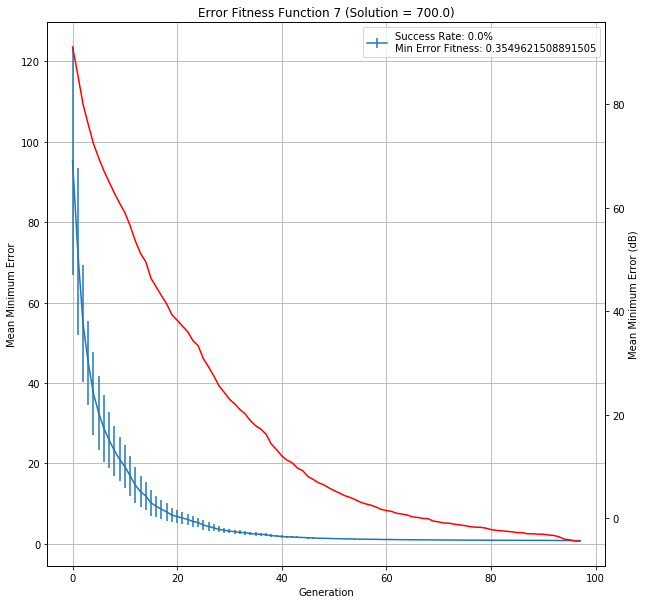

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.3,0.749218,0.752727,0.93655,0.881571,0.787752,0.613667,...,0.843382,0.857589,0.593547,0.834746,0.93928,0.672308,0.790927,0.803543,2:20:40,30000
